In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import re

from utils import *
from matplotlib import pyplot as plt
from pymongo import MongoClient

### Parâmetros do Matplotlib e SeaBorn

In [7]:
%matplotlib inline
pd.options.mode.chained_assignment = None 
plt.rcParams['figure.figsize'] = [10, 5]
sns.set(rc={'figure.figsize':(15,10)})

### Recuperação de DataSets do MongoDB

In [3]:
df_tipos_infracoes_2018 = mongo_to_dataframe("tipos_infracoes_2018")
df_acidentes_fatais_2008_2017 = mongo_to_dataframe("acidentes_fatais_2008_2017")
df_pedestres_mortos_trechos_ns_2008_2017 = mongo_to_dataframe("pedestres_mortos_trechos_ns_2008_2017")
df_cursos_oferecidos_detran_2018 = mongo_to_dataframe("cursos_oferecidos_detran_2018")
df_campanhas_educativas_detran_2012_2019 = mongo_to_dataframe("campanhas_educativas_detran_2012_2019")
df_acidentes_rodovias_2010_2019 = mongo_to_dataframe("acidentes_rodovias_2010_2019")
df_frota_veiculos_2009_2019 = mongo_to_dataframe("frota_veiculos_2009_2019")
df_numero_habilitados_2009_2018 = mongo_to_dataframe("numero_habilitados_2009_2018")
df_infracoes_2010_2018 = mongo_to_dataframe("infracoes_prf_2010_2018")

### Converte tipos DateTime no dataset de campanhas

In [3]:
df_campanhas_educativas_detran_2012_2019['Data de Início da campanha'] = pd.to_datetime(df_campanhas_educativas_detran_2012_2019['Data de Início da campanha'])
df_campanhas_educativas_detran_2012_2019['Data Inicial do Evento da Campanha'] = pd.to_datetime(df_campanhas_educativas_detran_2012_2019['Data Inicial do Evento da Campanha'])
df_campanhas_educativas_detran_2012_2019.head()

,Campanha,Objetivos da Campanha,Data de Início da campanha,Data Final da Campanha,Local do Evento da Campanha,Região Administrativa do Evento da Campanha,Qtd de Motoristas Abordados no Evento,Qtd de Pedestres Abordados no Evento,Qtd De Motociclistas Abordados no Evento,Qtd de Ciclistas Abordados no Evento,Data Inicial do Evento da Campanha,Hora Inicial do Evento da Campanha,Data Final do Evento da Campanha,Hora Final do Evento da Campanha,Relatório do Evento,Rodovia
0,GECED - BLITZEN NOTURNAS,Campanha Educativa de entrega de folder Alcool...,2015-11-27,2015-10-27 00:00:00.000,BR 070,--,700,0,0,0,2012-01-06,00:00:00:00,2012-01-06,00:00:00:00,NaN,NaN
1,Operação Funil,"Álcool e direção, conscientização de motoristas.",2012-01-10,2012-01-10 00:00:00.000,BR 040 - Posto da Polícia Rodoviária Federal,--,300,0,0,0,2012-01-10,00:00:00:00,2012-01-10,00:00:00:00,NaN,NaN
2,Operação Funil,Abordagem de carros. Operação iniciada ás 15:3...,2012-01-12,2012-01-12 00:00:00.000,BR 251/ DF 001 - Saída para Unaí,--,448,0,0,0,2012-01-12,00:00:00:00,2012-01-12,00:00:00:00,NaN,NaN
3,Operação Funil,Abordagem de carros iniciando ás 15h e finaliz...,2012-01-19,2012-12-30 00:00:00.000,CPRV BR 060 - Samambaia,--,550,0,0,0,2012-01-19,00:00:00:00,2012-01-19,00:00:00:00,NaN,NaN
4,Operação Funil,Abordagem de carros.,2012-01-06,2012-12-30 00:00:00.000,BR 020 Posto da BPRv,--,0,0,0,0,2012-01-20,00:00:00:00,2012-01-20,00:00:00:00,NaN,NaN


### Funções para verificação de registros de datas em anos diferentes

In [4]:
def verifica_ano(df):
    if df['Data Inicial do Evento da Campanha'].year == df['Data de Início da campanha'].year:
        return True
    else:
        return False

def ano_da_campanha(df):
    ano = df['Data de Início da campanha'].year
    
    return ano

df_campanhas_educativas_detran_2012_2019['verifica_ano'] = df_campanhas_educativas_detran_2012_2019.apply(verifica_ano, axis = 1)
df_campanhas_educativas_detran_2012_2019['Ano'] = df_campanhas_educativas_detran_2012_2019.apply(ano_da_campanha, axis = 1)

### Valida o ano de início das campanhas

Text(0.5, 1.0, 'Registros de eventos no mesmo ano da campanha')

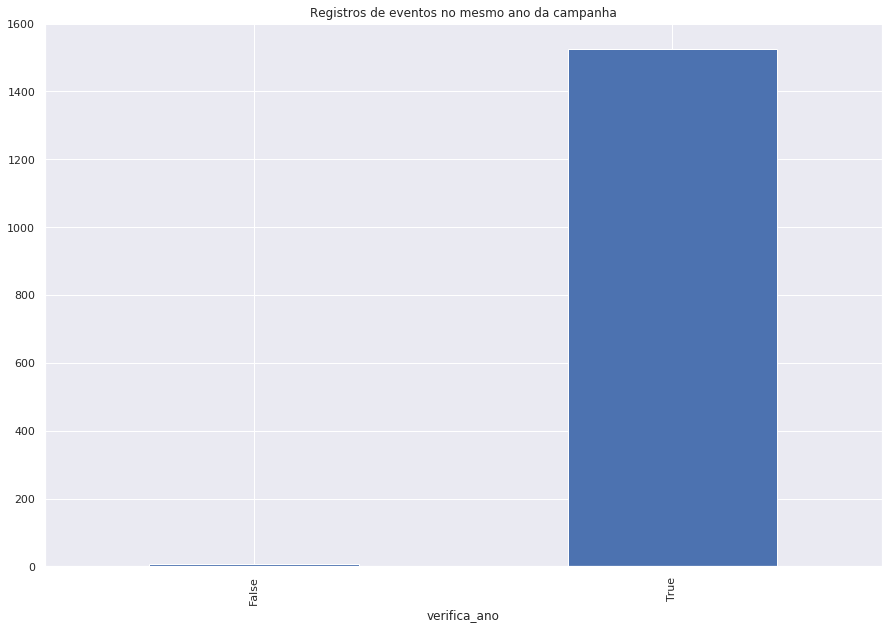

In [7]:
verifica_ano = df_campanhas_educativas_detran_2012_2019.groupby('verifica_ano')
verifica_ano.size().plot(kind = 'bar')
plt.title('Registros de eventos no mesmo ano da campanha')

In [6]:
df_campanhas_educativas_detran_2012_2019.head()

,Campanha,Objetivos da Campanha,Data de Início da campanha,Data Final da Campanha,Local do Evento da Campanha,Região Administrativa do Evento da Campanha,Qtd de Motoristas Abordados no Evento,Qtd de Pedestres Abordados no Evento,Qtd De Motociclistas Abordados no Evento,Qtd de Ciclistas Abordados no Evento,Data Inicial do Evento da Campanha,Hora Inicial do Evento da Campanha,Data Final do Evento da Campanha,Hora Final do Evento da Campanha,Relatório do Evento,Rodovia,verifica_ano,Ano
0,GECED - BLITZEN NOTURNAS,Campanha Educativa de entrega de folder Alcool...,2015-11-27,2015-10-27 00:00:00.000,BR 070,--,700,0,0,0,2012-01-06,00:00:00:00,2012-01-06,00:00:00:00,NaN,NaN,False,2015
1,Operação Funil,"Álcool e direção, conscientização de motoristas.",2012-01-10,2012-01-10 00:00:00.000,BR 040 - Posto da Polícia Rodoviária Federal,--,300,0,0,0,2012-01-10,00:00:00:00,2012-01-10,00:00:00:00,NaN,NaN,True,2012
2,Operação Funil,Abordagem de carros. Operação iniciada ás 15:3...,2012-01-12,2012-01-12 00:00:00.000,BR 251/ DF 001 - Saída para Unaí,--,448,0,0,0,2012-01-12,00:00:00:00,2012-01-12,00:00:00:00,NaN,NaN,True,2012
3,Operação Funil,Abordagem de carros iniciando ás 15h e finaliz...,2012-01-19,2012-12-30 00:00:00.000,CPRV BR 060 - Samambaia,--,550,0,0,0,2012-01-19,00:00:00:00,2012-01-19,00:00:00:00,NaN,NaN,True,2012
4,Operação Funil,Abordagem de carros.,2012-01-06,2012-12-30 00:00:00.000,BR 020 Posto da BPRv,--,0,0,0,0,2012-01-20,00:00:00:00,2012-01-20,00:00:00:00,NaN,NaN,True,2012


## Análise do histórico do número de campanhas por ano

### Observações

* Campanhas apresentam números irregulares no decorrer dos últimos anos
* Decrescimento notável no número de campanhas no intervalo dos anos de 2014-2017 (intervalo que apresenta número elevado de acidentes com feridos)
* Diminuição no número de campanhas em 2013 parece estar relacionado ao aumento de acidentes com feridos
* O número de acidentes com vítimas fatais aumentou durante o intervalo de decrescimento do número de eventos em 2014-2017, apresentando uma possível correlação. 
* Números baixos de registros são esperados para 2019 porque dados são apenas do primeiro semestre

Text(0.5, 1.0, 'Número de campanhas de Trânsito por ano')

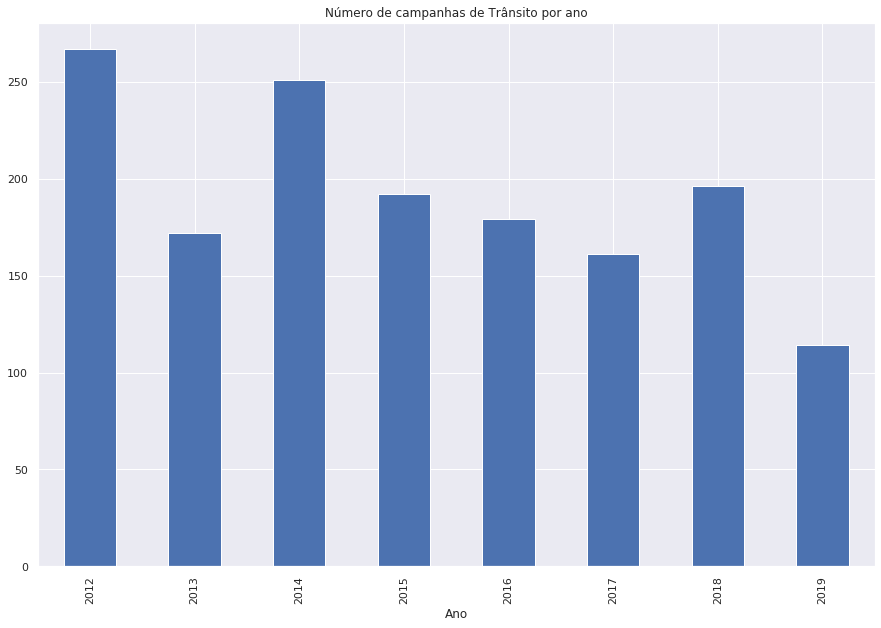

In [8]:
numero_de_campanhas_por_regiao = df_campanhas_educativas_detran_2012_2019.groupby('Ano')
numero_de_campanhas_por_regiao.size().plot(kind = 'bar')
plt.title('Número de campanhas de Trânsito por ano')

### Observações

* Grande parte das campanhas aconteceram em rodovias que não pertencem a uma única RA, não sendo possível a classificação
* Campanhas se concentram nas regiões com maior número de acidentes com vítimas fatais, exceto Samambaia, onde o número de campanhas é pequeno se comparado as outras regiões e cidades com menor número de ocorrências

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text xticklabel objects>)

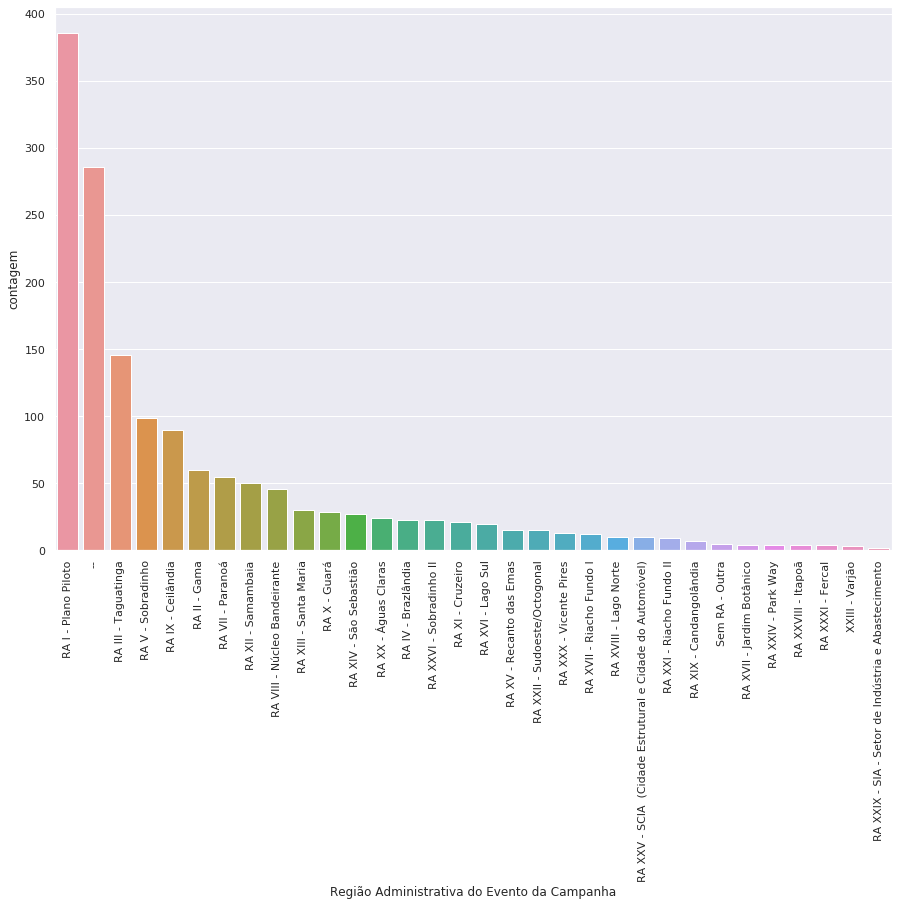

In [20]:
numero_de_campanhas_por_regiao = df_campanhas_educativas_detran_2012_2019.groupby('Região Administrativa do Evento da Campanha')
numero_de_campanhas_por_regiao = numero_de_campanhas_por_regiao.size().reset_index(name = 'contagem')
numero_de_campanhas_por_regiao = numero_de_campanhas_por_regiao.sort_values('contagem', ascending = False)

regioes = numero_de_campanhas_por_regiao['Região Administrativa do Evento da Campanha']
contagem = numero_de_campanhas_por_regiao['contagem']

sns.barplot(x = regioes, y = contagem, data = numero_de_campanhas_por_regiao)
plt.xticks(rotation = 90)


### Observações

* Existe uma correlação média positiva entre os registros de acidentes fatais do DER e o número de campanhas no intervalo 2012 - 2017
* A correlação é mais forte com os registros de acidentes fatais da PRF
* Existe uma correlação negativa média entre o número de campanhas e acidentes com feridos, que é o tipo de acidente mais comum registrado em rodovias.
* Existe uma correlação forte positiva entre acidentes sem vítimas da PRF e o número de campanhas

0.38118657453990573


Text(0.5, 1.0, 'Correlação de Pearson entre número de acidentes do DER e número de campanhas')

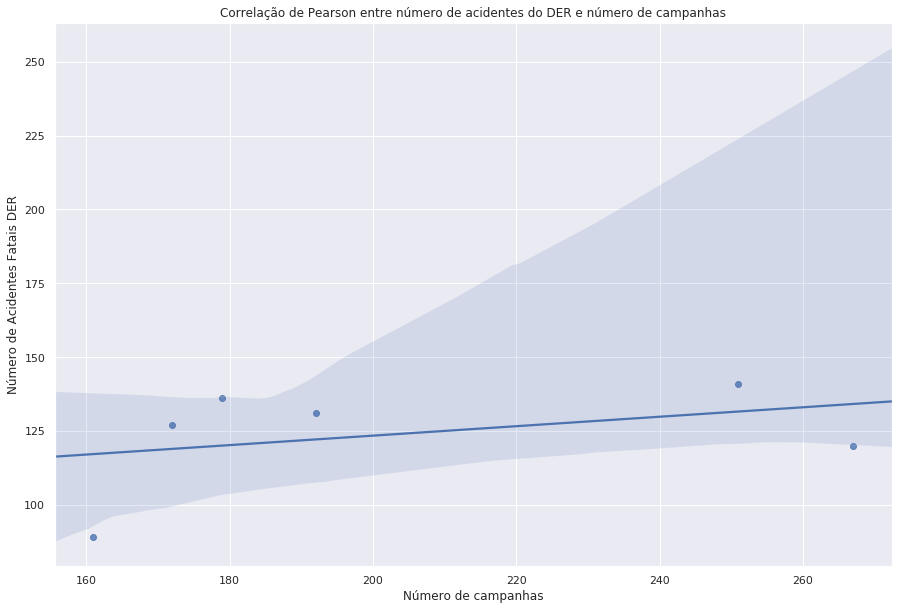

In [8]:
numero_campanhas_por_ano = df_campanhas_educativas_detran_2012_2019
numero_campanhas_por_ano['Data de Início da campanha'] = pd.to_datetime(numero_campanhas_por_ano['Data de Início da campanha'])
numero_campanhas_por_ano['Ano'] = numero_campanhas_por_ano['Data de Início da campanha'].dt.year
numero_campanhas_por_ano = numero_campanhas_por_ano[numero_campanhas_por_ano.Ano <= 2017]
numero_campanhas_por_ano = numero_campanhas_por_ano.groupby('Ano').size().reset_index(name = 'Número de campanhas')

acidentes_fatais_2012_2017_DER = df_acidentes_fatais_2008_2017
acidentes_fatais_2012_2017_DER['Ano'] = acidentes_fatais_2012_2017_DER['Ano'].astype(int)
acidentes_fatais_2012_2017_DER = acidentes_fatais_2012_2017_DER[acidentes_fatais_2012_2017_DER.Ano >= 2012]
acidentes_fatais_2012_2017_DER = acidentes_fatais_2012_2017_DER.groupby('Ano').size().reset_index(name = 'Número de Acidentes Fatais DER')

corr_acidentes_fatais_DER_campanhas = pd.merge(numero_campanhas_por_ano, acidentes_fatais_2012_2017_DER, left_on = 'Ano', right_on = 'Ano')
corr_acidentes_fatais_DER_campanhas
correlacao_acidentes_fatais_DER_campanhas = corr_acidentes_fatais_DER_campanhas['Número de campanhas'].corr(corr_acidentes_fatais_DER_campanhas['Número de Acidentes Fatais DER'])

print(correlacao_acidentes_fatais_DER_campanhas)
sns.regplot(x = "Número de campanhas", y = "Número de Acidentes Fatais DER", fit_reg = True, data = corr_acidentes_fatais_DER_campanhas)
plt.title('Correlação de Pearson entre número de acidentes do DER e número de campanhas')

0.4328638343674275


Text(0.5, 1.0, 'Correlação de Pearson entre o número de acidentes da PRF e número de campanhas')

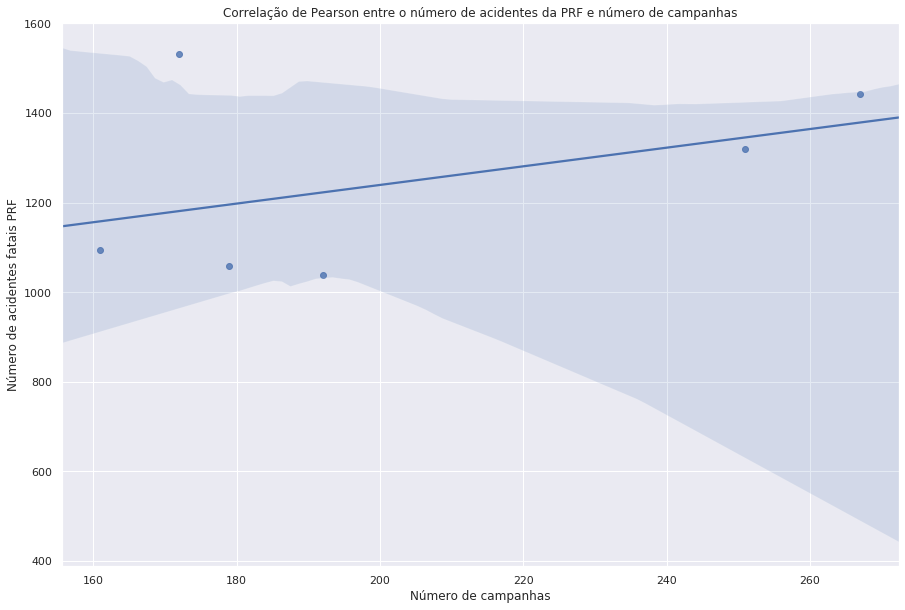

In [49]:
acidentes_fatais_2012_2017_PRF = df_acidentes_rodovias_2010_2019
acidentes_fatais_2012_2017_PRF.data_inversa = pd.to_datetime(acidentes_fatais_2012_2017_PRF.data_inversa)
acidentes_fatais_2012_2017_PRF['Ano'] = acidentes_fatais_2012_2017_PRF.data_inversa.dt.year
acidentes_fatais_2012_2017_PRF = acidentes_fatais_2012_2017_PRF[acidentes_fatais_2012_2017_PRF.Ano >= 2012]
acidentes_fatais_2012_2017_PRF = acidentes_fatais_2012_2017_PRF[acidentes_fatais_2012_2017_PRF.Ano <= 2017]
acidentes_fatais_2012_2017_PRF = acidentes_fatais_2012_2017_PRF.groupby('Ano').size().reset_index(name = 'Número de acidentes fatais PRF')
acidentes_fatais_2012_2017_PRF

corr_acidentes_fatais_PRF_campanhas = pd.merge(numero_campanhas_por_ano, acidentes_fatais_2012_2017_PRF, left_on = 'Ano', right_on = 'Ano')
correlacao_acidentes_fatais_PRF_campanhas = corr_acidentes_fatais_PRF_campanhas['Número de campanhas'].corr(corr_acidentes_fatais_PRF_campanhas['Número de acidentes fatais PRF'])

print(correlacao_acidentes_fatais_PRF_campanhas)
sns.regplot(x = "Número de campanhas", y = "Número de acidentes fatais PRF", fit_reg = True, data = corr_acidentes_fatais_PRF_campanhas)
plt.title('Correlação de Pearson entre o número de acidentes da PRF e número de campanhas')

-0.32072157004785534


Text(0.5, 1.0, 'Correlação de Pearson entre o número de acidentes com feridos da PRF e número de campanhas')

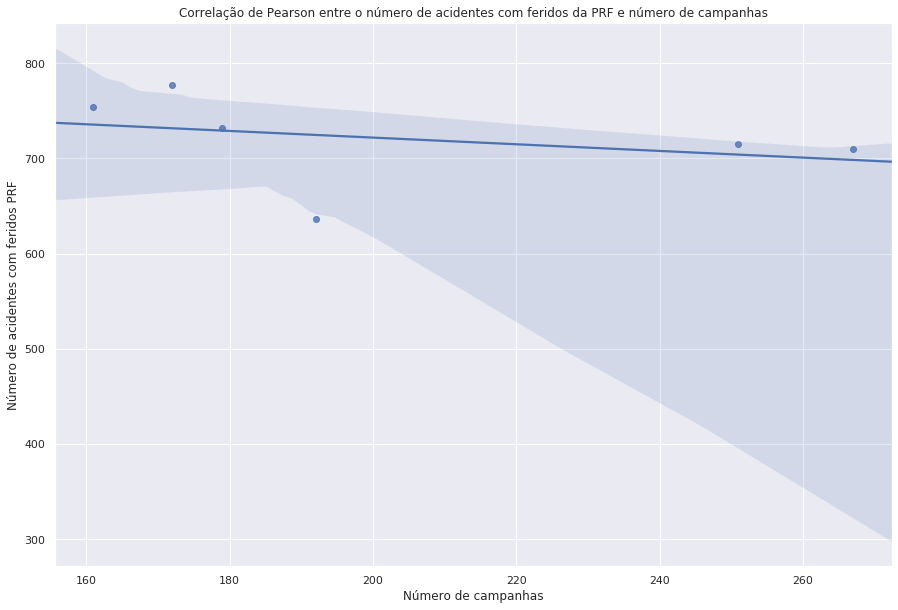

In [11]:
acidentes_feridos_2012_2017_PRF = df_acidentes_rodovias_2010_2019[df_acidentes_rodovias_2010_2019.classificacao_acidente == "Com Vítimas Feridas"]
acidentes_feridos_2012_2017_PRF.data_inversa = pd.to_datetime(acidentes_feridos_2012_2017_PRF.data_inversa)
acidentes_feridos_2012_2017_PRF['Ano'] = acidentes_feridos_2012_2017_PRF.data_inversa.dt.year
acidentes_feridos_2012_2017_PRF = acidentes_feridos_2012_2017_PRF[acidentes_feridos_2012_2017_PRF.Ano >= 2012]
acidentes_feridos_2012_2017_PRF = acidentes_feridos_2012_2017_PRF[acidentes_feridos_2012_2017_PRF.Ano <= 2017]
acidentes_feridos_2012_2017_PRF = acidentes_feridos_2012_2017_PRF.groupby('Ano').size().reset_index(name = 'Número de acidentes com feridos PRF')

corr_acidentes_feridos_PRF_campanhas = pd.merge(numero_campanhas_por_ano, acidentes_feridos_2012_2017_PRF, left_on = 'Ano', right_on = 'Ano')
corr_acidentes_feridos_PRF_campanhas

correlacao_acidentes_feridos_PRF_campanhas = corr_acidentes_feridos_PRF_campanhas['Número de campanhas'].corr(corr_acidentes_feridos_PRF_campanhas['Número de acidentes com feridos PRF'])
print(correlacao_acidentes_feridos_PRF_campanhas)

sns.regplot(x = "Número de campanhas", y = "Número de acidentes com feridos PRF", fit_reg = True, data = corr_acidentes_feridos_PRF_campanhas)
plt.title('Correlação de Pearson entre o número de acidentes com feridos da PRF e número de campanhas')

0.5059621531776048


Text(0.5, 1.0, 'Correlação de Pearson entre o número de acidentes sem vítimas da PRF e número de campanhas')

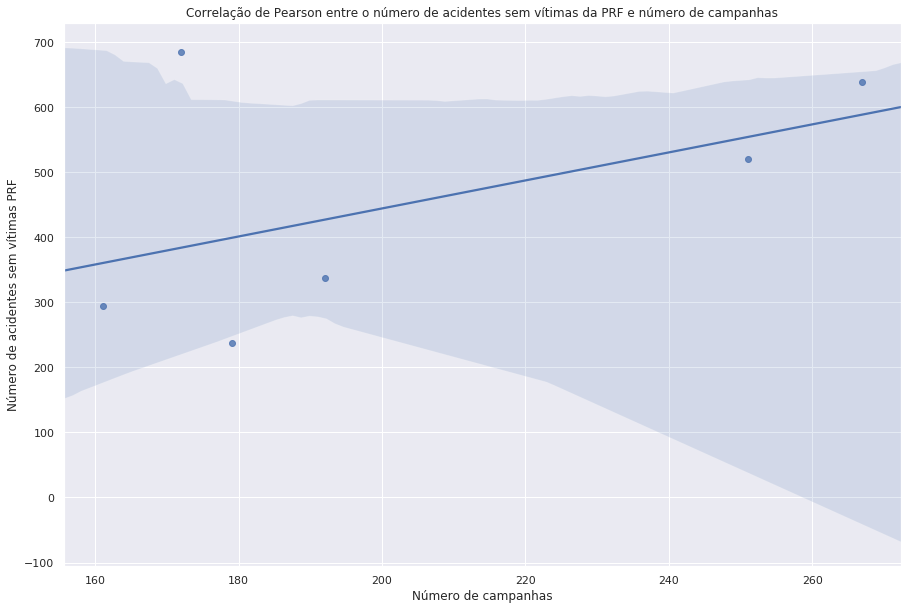

In [44]:
acidentes_sem_vitimas_2012_2017_PRF = df_acidentes_rodovias_2010_2019[df_acidentes_rodovias_2010_2019.classificacao_acidente == "Sem Vítimas"]
acidentes_sem_vitimas_2012_2017_PRF.data_inversa = pd.to_datetime(acidentes_sem_vitimas_2012_2017_PRF.data_inversa)
acidentes_sem_vitimas_2012_2017_PRF['Ano'] = acidentes_sem_vitimas_2012_2017_PRF.data_inversa.dt.year
acidentes_sem_vitimas_2012_2017_PRF = acidentes_sem_vitimas_2012_2017_PRF[acidentes_sem_vitimas_2012_2017_PRF.Ano >= 2012]
acidentes_sem_vitimas_2012_2017_PRF = acidentes_sem_vitimas_2012_2017_PRF[acidentes_sem_vitimas_2012_2017_PRF.Ano <= 2017]
acidentes_sem_vitimas_2012_2017_PRF = acidentes_sem_vitimas_2012_2017_PRF.groupby('Ano').size().reset_index(name = 'Número de acidentes sem vítimas PRF')

corr_acidentes_sem_vitimas_PRF_campanhas = pd.merge(numero_campanhas_por_ano, acidentes_sem_vitimas_2012_2017_PRF, left_on = 'Ano', right_on = 'Ano')
corr_acidentes_sem_vitimas_PRF_campanhas

correlacao_acidentes_sem_vitimas_PRF_campanhas = corr_acidentes_sem_vitimas_PRF_campanhas['Número de campanhas'].corr(corr_acidentes_sem_vitimas_PRF_campanhas['Número de acidentes sem vítimas PRF'])
print(correlacao_acidentes_sem_vitimas_PRF_campanhas)

sns.regplot(x = "Número de campanhas", y = "Número de acidentes sem vítimas PRF", fit_reg = True, data = corr_acidentes_sem_vitimas_PRF_campanhas)
plt.title('Correlação de Pearson entre o número de acidentes sem vítimas da PRF e número de campanhas')

### Observações

* Número de acidentes não parece estar correlacionado em relação a DER e PRF

In [50]:
correlacao_acidentes_DER_PRF = pd.merge(acidentes_fatais_2012_2017_DER, acidentes_fatais_2012_2017_PRF, left_on = 'Ano', right_on = 'Ano')
correlacao_acidentes = correlacao_acidentes_DER_PRF['Número de Acidentes Fatais DER'].corr(correlacao_acidentes_DER_PRF['Número de acidentes fatais PRF'])
correlacao_acidentes_DER_PRF
print(correlacao_acidentes)
#sns.regplot(x = "Número de Acidentes Fatais DER", y = "Número de acidentes fatais PRF", fit_reg = True, data = correlacao_acidentes_DER_PRF)

0.14903457552068589


### Observações

* Principais tipos de campanhas são direcionadas à jovens e crianças utilizando teatro, logo é improvável um impacto imediato nos indicadores de trânsito atuais
* Outras principais campanhas são Maio amarelo e carnaval

In [9]:
tipos_campanhas = df_campanhas_educativas_detran_2012_2019['Campanha'].value_counts().to_frame()
tipos_campanhas.head(n = 20)

,Campanha
"educando nos "" CURSOS DE FORMAÇÃO DE CONDUTORES """,109
TEATRO,109
Operação Farol Baixo - Lei 13.290/2016,70
MAIO AMARELO,41
MAIO AMARELO 2014,39
GETRA 2015 - Palestra Educativa nas Escolas,38
MAIO AMARELO 2015,35
PALESTRAS CAMPANHA E TRANSITOLANDIA - EXTERNAS 2014,34
CAMPANHA VOLTA ÀS AULAS 2014,34
GETRA - Campanha Volta às Aulas 2015,29


### Observações
* Número de campanhas do maio amarelo se elevou no intervalo 2015-2017
* O número de eventos da campanha é irregular
* Apesar dos resultados divulgados e dos índices de 2016, os acidentes com vítimas fatais estavam no pico durante o mês de maio
* Em 2017 os acidentes fatais tiveram uma queda significante nos registros do DER e PRF, mas acidentes sem vítimas e com feridos aumentaram durante este período

Text(0.5, 1.0, 'Histórico do número de eventos da campanha Maio Amarelo por ano')

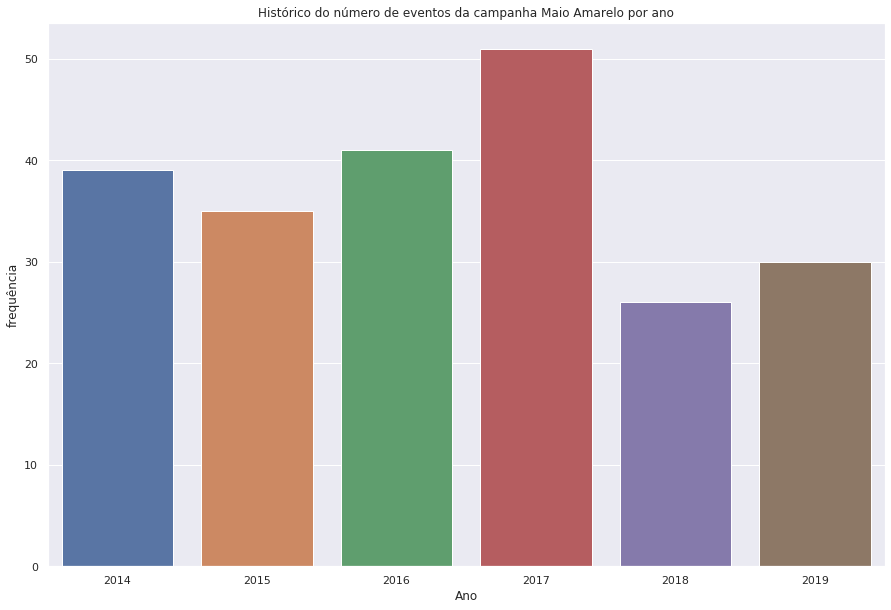

In [19]:
maio_amarelo = df_campanhas_educativas_detran_2012_2019[df_campanhas_educativas_detran_2012_2019.Campanha.str.contains('MAIO', regex = True, na = False) | df_campanhas_educativas_detran_2012_2019.Campanha.str.contains('AMARELO', regex = True, na = False) | df_campanhas_educativas_detran_2012_2019.Campanha.str.contains('Maio', regex = True, na = False)]
maio_amarelo['Data de Início da campanha'] = pd.to_datetime(maio_amarelo['Data de Início da campanha'])
maio_amarelo['Ano'] = maio_amarelo['Data de Início da campanha'].dt.year
maio_amarelo = maio_amarelo.groupby('Ano').size().reset_index(name = 'frequência')

sns.barplot(x = 'Ano', y = 'frequência', data = maio_amarelo)
plt.title('Histórico do número de eventos da campanha Maio Amarelo por ano')

In [138]:
maio_amarelo.head()

,Campanha,Objetivos da Campanha,Data de Início da campanha,Data Final da Campanha,Local do Evento da Campanha,Região Administrativa do Evento da Campanha,Qtd de Motoristas Abordados no Evento,Qtd de Pedestres Abordados no Evento,Qtd De Motociclistas Abordados no Evento,Qtd de Ciclistas Abordados no Evento,Data Inicial do Evento da Campanha,Hora Inicial do Evento da Campanha,Data Final do Evento da Campanha,Hora Final do Evento da Campanha,Relatório do Evento,Rodovia,Ano
556,MAIO AMARELO 2014,É O MES DE CONCIENTIZAÇÃO SOBRE SEGURANÇA NO T...,2014-05-01,2014-06-01 00:00:00.000,PLATAFORMA RODOVIÁRIA,RA I - Plano Piloto,0,694,0,0,2014-05-08,09:00:00:00,2014-05-08,11:00:00:00,NaN,NaN,2014
557,MAIO AMARELO 2014,É O MES DE CONCIENTIZAÇÃO SOBRE SEGURANÇA NO T...,2014-05-01,2014-06-01 00:00:00.000,DF 002-KM 03-EIXO NORTE,RA I - Plano Piloto,0,0,0,750,2014-05-01,09:00:00:00,2014-05-01,11:00:00:00,NaN,NaN,2014
558,MAIO AMARELO 2014,É O MES DE CONCIENTIZAÇÃO SOBRE SEGURANÇA NO T...,2014-05-01,2014-06-01 00:00:00.000,DF 003-KM 08- EPIA NORTE,RA I - Plano Piloto,500,0,0,0,2014-05-01,09:00:00:00,2014-05-01,11:00:00:00,NaN,NaN,2014
559,MAIO AMARELO 2014,É O MES DE CONCIENTIZAÇÃO SOBRE SEGURANÇA NO T...,2014-05-01,2014-06-01 00:00:00.000,DF 001-KM 78- PISTÃO NORTE,RA III - Taguatinga,300,0,0,0,2014-05-02,09:00:00:00,2014-05-02,11:00:00:00,NaN,NaN,2014
560,MAIO AMARELO 2014,É O MES DE CONCIENTIZAÇÃO SOBRE SEGURANÇA NO T...,2014-05-01,2014-06-01 00:00:00.000,DF 001-KM 78-PISTÃO NORTE,RA III - Taguatinga,300,0,0,0,2014-05-02,14:00:00:00,2014-05-02,16:00:00:00,NaN,NaN,2014


### Observações

* A operação funil é a segunda maior campanha nos registros do DF destinada aos condutores
* Ocorreu somente durante os anos de 2012 e 2013
* A operação aconteceu nos meses em destaque nos gráficos abaixo
* Maior número da campanha se concentra no mês de Janeiro, que possui um número elevado de registros de acidentes devido às férias

Text(0.5, 1.0, 'Número de Eventos da Operação funil por ano')

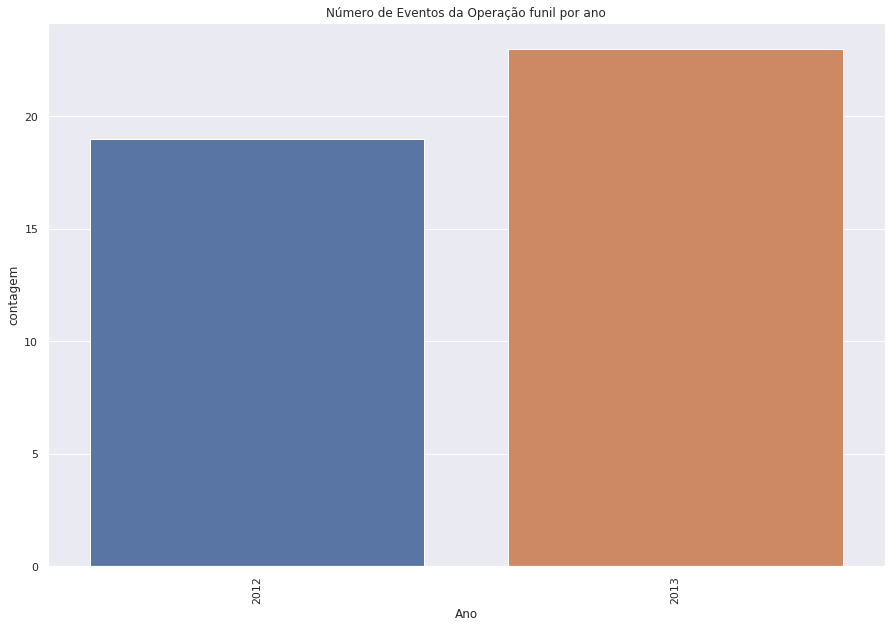

In [31]:
operacao_funil = df_campanhas_educativas_detran_2012_2019[df_campanhas_educativas_detran_2012_2019.Campanha.str.contains('FUNIL', regex = True, na = False) | df_campanhas_educativas_detran_2012_2019.Campanha.str.contains('Funil', regex = True, na = False)]
operacao_funil['Data de Início da campanha'] = pd.to_datetime(operacao_funil['Data de Início da campanha'])
operacao_funil['Ano'] = operacao_funil['Data de Início da campanha'].dt.year
operacao_funil['Mes'] = operacao_funil['Data de Início da campanha'].dt.month

operacao_funil_por_ano = operacao_funil.groupby(['Ano']).size().reset_index(name = 'contagem')
sns.barplot(y = 'contagem', x = 'Ano', data = operacao_funil_por_ano)
plt.xticks(rotation = 90)
plt.title('Número de Eventos da Operação funil por ano')

Text(0.5, 1.0, 'Número de registros da operação funil por mês')

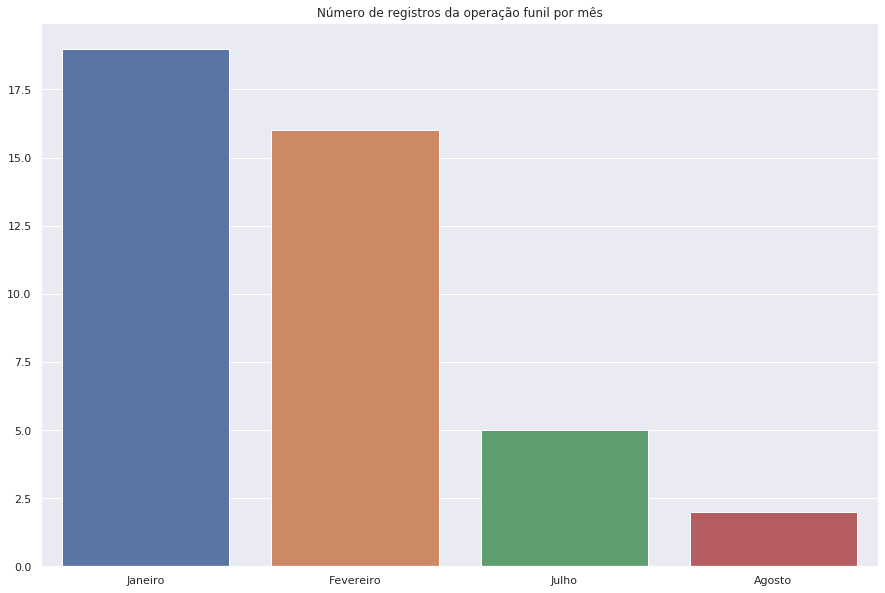

In [32]:
operacao_funil = operacao_funil.groupby(['Ano', 'Mes']).size().unstack()
operacao_funil.columns = ['Janeiro', 'Fevereiro', 'Julho', 'Agosto']

sns.barplot(data = operacao_funil)
plt.title('Número de registros da operação funil por mês')

### Identificação das regiões do DF com o maior número de acidentes fatais de trânsito

* As 5 regiões com o maior número de acidentes são Ceilândia, Brasília (Plano Piloto), Taguatinga, Samambaia e Santa Maria

Text(0.5, 1.0, 'Regiões com maior número de acidentes fatais')

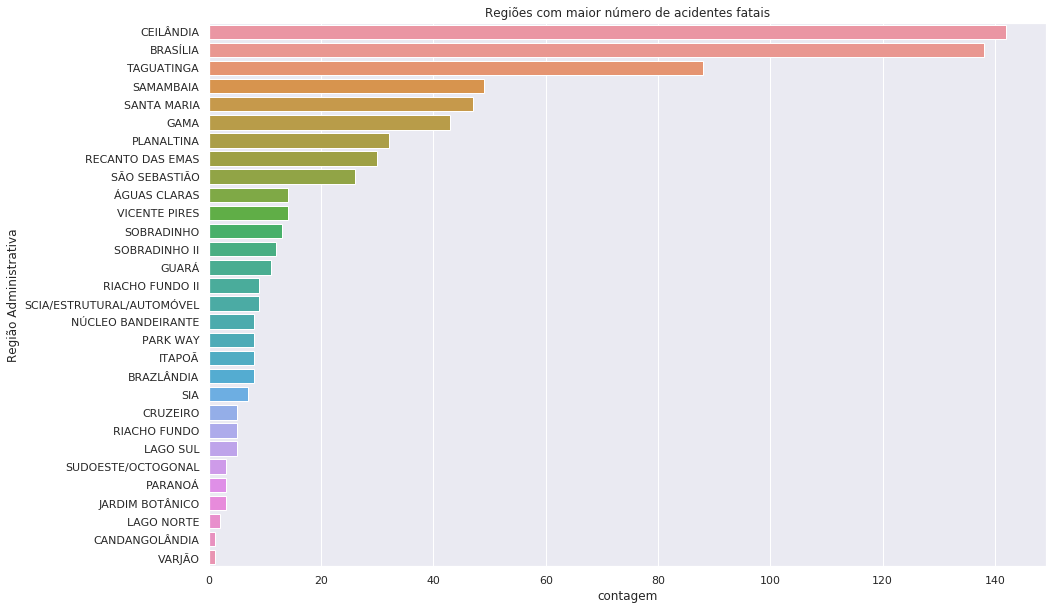

In [12]:
df_acidentes_fatais_2008_2017['Ano'] = df_acidentes_fatais_2008_2017['Ano'].astype(int)
df_acidentes_fatais_2012_2017 = df_acidentes_fatais_2008_2017[df_acidentes_fatais_2008_2017.Ano >= 2012]

acidentes_fatais_por_regiao = df_acidentes_fatais_2012_2017.groupby('Região Administrativa').size().reset_index(name = 'contagem')
acidentes_fatais_por_regiao = acidentes_fatais_por_regiao.sort_values('contagem', ascending = False)
contagem = acidentes_fatais_por_regiao['contagem']
regioes = acidentes_fatais_por_regiao['Região Administrativa']

sns.barplot(x = contagem, y = regioes, data = acidentes_fatais_por_regiao)
plt.title('Regiões com maior número de acidentes fatais')

### Identifica quais são as naturezas dos principais tipos de acidentes

Text(0.5, 1.0, 'Frequência dos tipos de acidentes')

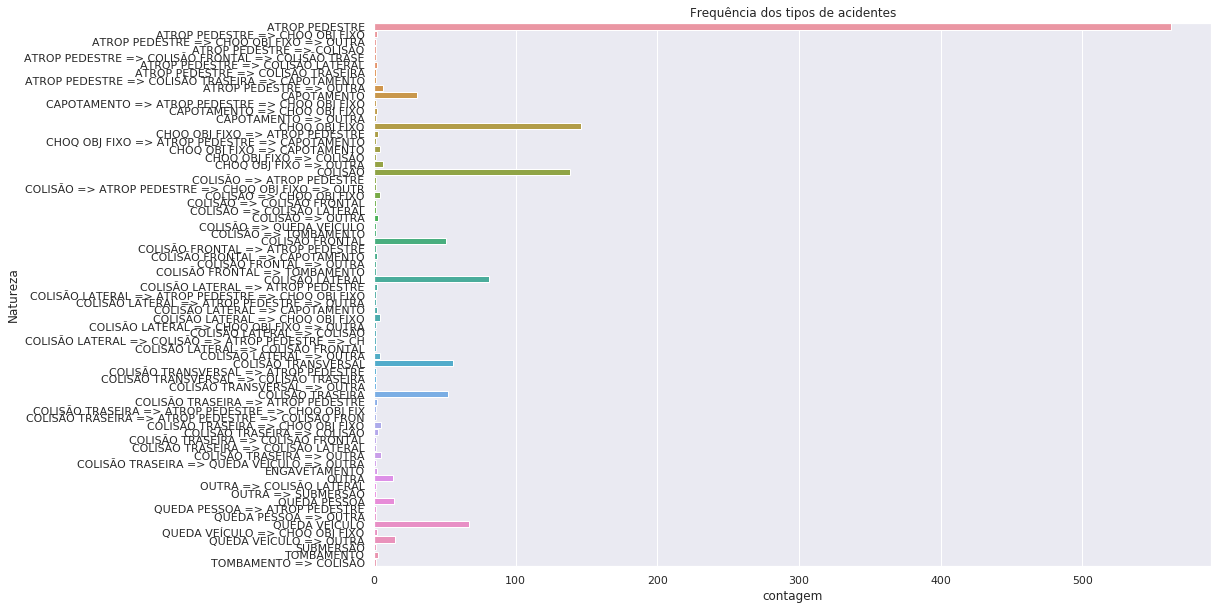

In [14]:
principais_tipos_acidentes_fatais = df_acidentes_fatais_2008_2017.groupby('Natureza').size().reset_index(name = 'contagem')
contagem_dos_acidentes = principais_tipos_acidentes_fatais['contagem']
natureza_dos_acidentes = principais_tipos_acidentes_fatais['Natureza']

sns.barplot(y = natureza_dos_acidentes, x = contagem_dos_acidentes, data = principais_tipos_acidentes_fatais)
plt.title('Frequência dos tipos de acidentes')

### Observações

* Os diferentes tipos de natureza não estão contidos em subgrupos dos tipos de natureza de acidentes de alto nível
* Principais tipos de acidentes fatais de 2012 a 2019
* Certas sequências específicas ficam com poucos dados, devido a ordem das naturezas do acidentes
* As altas velocidades nas rodovias aparentam ter um impacto nos índices elevados de colisões com fatalidade (comprovar)

Text(0.5, 1, 'Tipos de acidentes fatais DER')

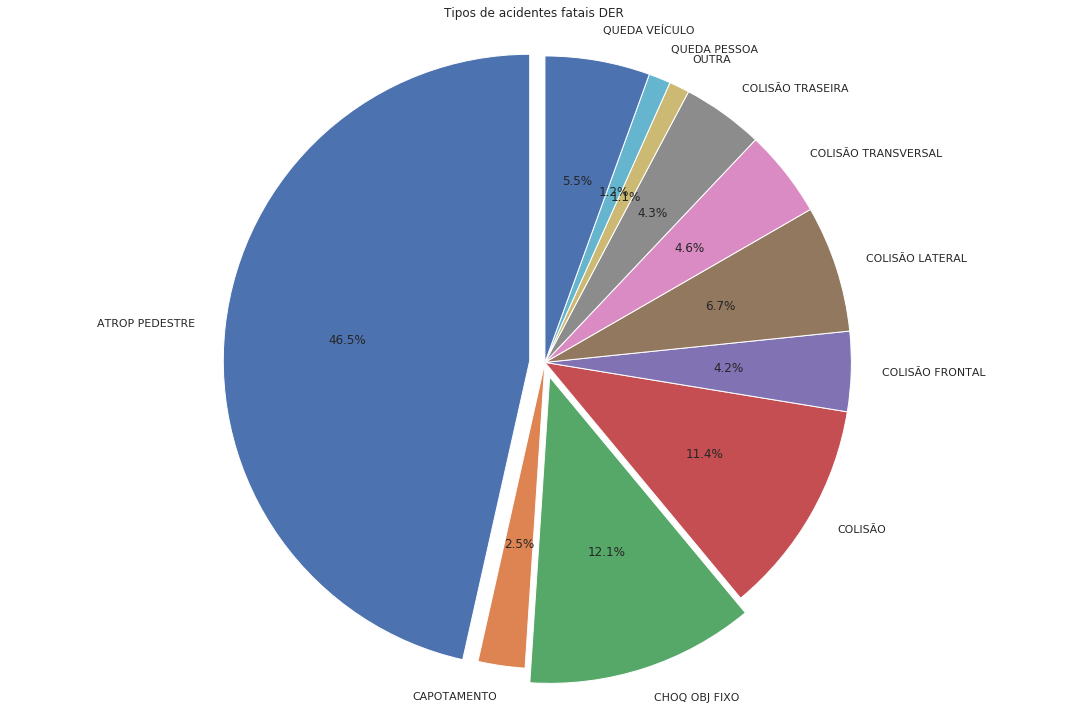

In [15]:
whitelist = ['ATROP PEDESTRE', 'CAPOTAMENTO', 'CHOQ OBJ FIXO', 'COLISÃO', 'COLISÃO FRONTAL', 'COLISÃO LATERAL', 'COLISÃO TRANSVERSAL', 'COLISÃO TRASEIRA', 'QUEDA VEÍCULO', 'QUEDA PESSOA', 'OUTRA']
principais_tipos_acidentes_fatais = principais_tipos_acidentes_fatais[principais_tipos_acidentes_fatais.Natureza.isin(whitelist)]

labels = principais_tipos_acidentes_fatais['Natureza']
sizes = principais_tipos_acidentes_fatais['contagem']

explode = (0.05, 0, 0.05, 0, 0, 0, 0, 0, 0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, explode = explode, autopct='%1.1f%%', startangle = 90)

ax1.axis('equal')  
plt.tight_layout()
plt.title('Tipos de acidentes fatais DER')

### Observações
* Número de acidentes com vítimas fatais diminuiu drasticamente no intervalo dos anos 2016-2017
* Em comparação com os maiores números de campanhas os anos seguintes não apresentaram diminuições significantes no número de acidentes
* Em contraste com as outras principais cidades o Gama apresentou um índice alto de acidentes fatais no intervalo 2016-2017

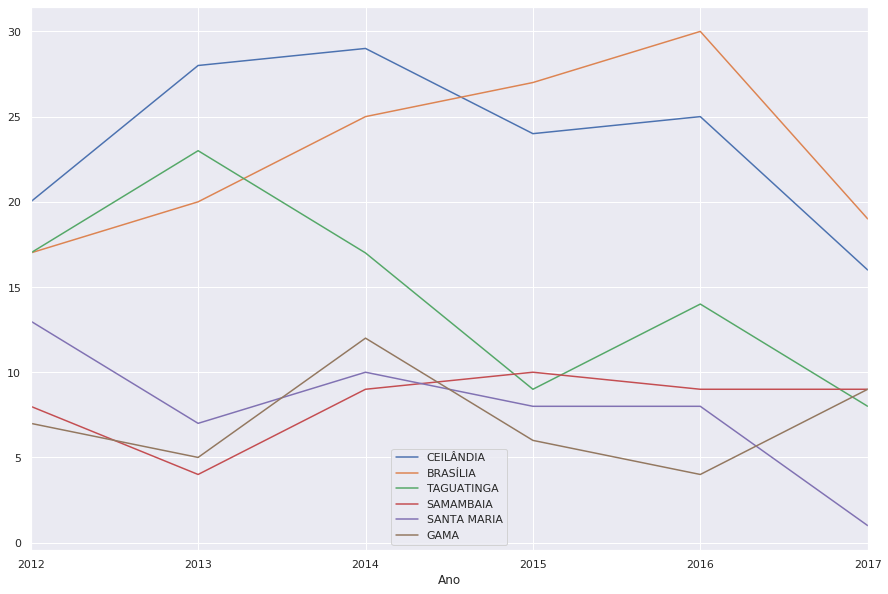

In [212]:
acidentes_fatais_por_ano = df_acidentes_fatais_2012_2017.groupby(['Ano', 'Região Administrativa']).size().unstack()

for cidade in acidentes_fatais_por_ano.columns:
    acidentes_fatais_por_ano[cidade] = (acidentes_fatais_por_ano[cidade].fillna(0).astype(int) / 2)


cidades_com_mais_acidentes = ['CEILÂNDIA', 'BRASÍLIA', 'TAGUATINGA', 'SAMAMBAIA', 'SANTA MARIA', 'GAMA']

for cidade in cidades_com_mais_acidentes:
    acidentes_fatais_por_ano[cidade].plot()
    leg = plt.legend()   

### Observações

* Foram poucos os acidentes com vítimas fatais registrados pela PRF

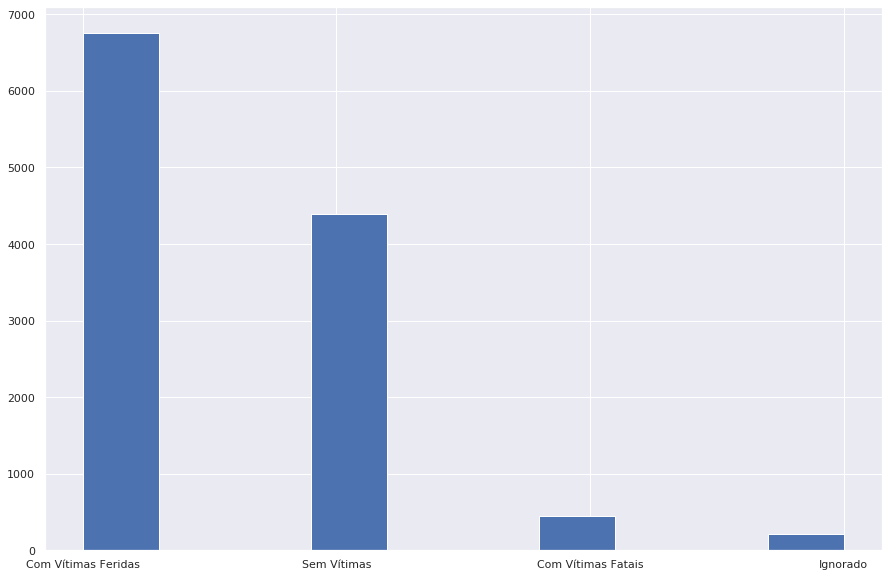

In [6]:
df_acidentes_rodovias_2010_2019.classificacao_acidente.hist()

### Observações

* Acidentes com vítimas feridas tiveram uma queda durante o intervalo 2013 - 2014
* Acidentes com vítimas feridas aumentaram nos anos 2015-2016/2017 (Investigar esse intervalo)

Text(0.5, 1.0, 'Histórico de acidentes em rodovias da PRF')

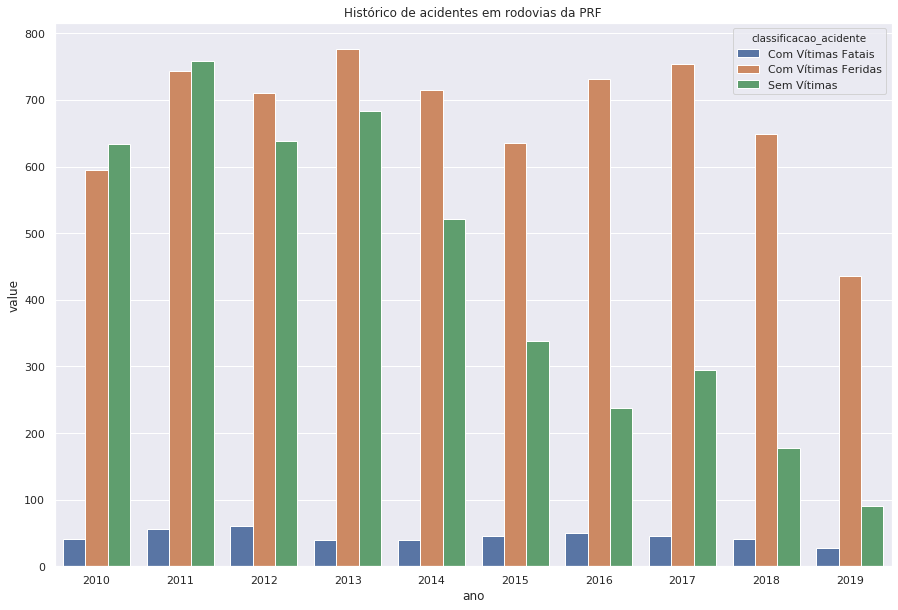

In [39]:
acidentes_rodovias_por_ano = df_acidentes_rodovias_2010_2019.groupby(['ano', 'classificacao_acidente']).size().unstack()
acidentes_rodovias_por_ano.drop('Ignorado', axis = 1)
acidentes_rodovias_por_ano = acidentes_rodovias_por_ano.reset_index()
acidentes_rodovias_por_ano = acidentes_rodovias_por_ano.melt(id_vars = 'ano', value_vars = ['Com Vítimas Fatais', 'Com Vítimas Feridas', 'Sem Vítimas'])

sns.barplot(x = 'ano', y = 'value', hue = 'classificacao_acidente', data = acidentes_rodovias_por_ano)
plt.title('Histórico de acidentes em rodovias da PRF')

### Observações

* Nos meses de maio de 2013, 2015, 2017 e 2018 houve uma diminuição no número de acidentes com vítimas fatais
* Não parece existir uma relação forte entre número de eventos da campanha e número de acidentes fatais em rodovias
* Nos meses de maio dos anos de 2014, 2015, 2016 e 2018 houve uma diminuição no número de acidentes com feridos (PRF)
* Número de acidentes registrados pelo DER diminuiu no intervalo 2014-2017, exceto pelo ano de 2016 que apresentou um número elevado de acidentes
* Os meses Maio e Junho estão entre os meses com maior número de feridos (PRF)
* Após uma queda em Maio do ano anterior o número de acidentes com feridos voltou a se elevar em Maio de 2019 (PRF)

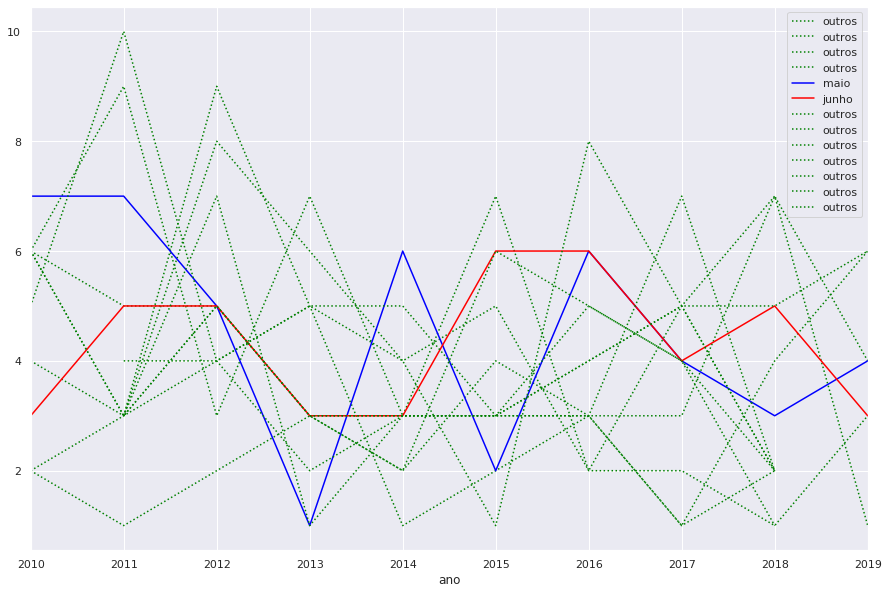

In [66]:
acidentes_com_vitimas = df_acidentes_rodovias_2010_2019[df_acidentes_rodovias_2010_2019.classificacao_acidente == "Com Vítimas Fatais"]
acidentes_com_vitimas_janeiro = acidentes_com_vitimas[acidentes_com_vitimas.data_inversa.dt.month == 1].groupby('ano').size()
acidentes_com_vitimas_fevereiro = acidentes_com_vitimas[acidentes_com_vitimas.data_inversa.dt.month == 2].groupby('ano').size()
acidentes_com_vitimas_março = acidentes_com_vitimas[acidentes_com_vitimas.data_inversa.dt.month == 3].groupby('ano').size()
acidentes_com_vitimas_abril = acidentes_com_vitimas[acidentes_com_vitimas.data_inversa.dt.month == 4].groupby('ano').size()
acidentes_com_vitimas_maio = acidentes_com_vitimas[acidentes_com_vitimas.data_inversa.dt.month == 5].groupby('ano').size()
acidentes_com_vitimas_junho = acidentes_com_vitimas[acidentes_com_vitimas.data_inversa.dt.month == 6].groupby('ano').size()
acidentes_com_vitimas_julho = acidentes_com_vitimas[acidentes_com_vitimas.data_inversa.dt.month == 7].groupby('ano').size()
acidentes_com_vitimas_agosto = acidentes_com_vitimas[acidentes_com_vitimas.data_inversa.dt.month == 8].groupby('ano').size()
acidentes_com_vitimas_setembro = acidentes_com_vitimas[acidentes_com_vitimas.data_inversa.dt.month == 9].groupby('ano').size()
acidentes_com_vitimas_outubro = acidentes_com_vitimas[acidentes_com_vitimas.data_inversa.dt.month == 10].groupby('ano').size()
acidentes_com_vitimas_novembro = acidentes_com_vitimas[acidentes_com_vitimas.data_inversa.dt.month == 11].groupby('ano').size()
acidentes_com_vitimas_dezembro = acidentes_com_vitimas[acidentes_com_vitimas.data_inversa.dt.month == 12].groupby('ano').size()

acidentes_com_vitimas = [acidentes_com_vitimas_janeiro, acidentes_com_vitimas_fevereiro, acidentes_com_vitimas_março, acidentes_com_vitimas_abril, acidentes_com_vitimas_maio, acidentes_com_vitimas_junho, acidentes_com_vitimas_julho, acidentes_com_vitimas_agosto, acidentes_com_vitimas_agosto, acidentes_com_vitimas_setembro, acidentes_com_vitimas_outubro, acidentes_com_vitimas_novembro, acidentes_com_vitimas_dezembro]
count = 1
for acidente in acidentes_com_vitimas:
    
    if count == 5:
        acidente.plot(linestyle = '-', color = 'blue', label = 'maio')
        label_added = True
        
    elif count == 6:
        acidente.plot(linestyle = '-', color = 'red', label = 'junho')
        label_added = True
    else:
        acidente.plot(linestyle = 'dotted', color = 'green', label = 'outros')
        label_added = True
    leg = plt.legend()
    count = count + 1


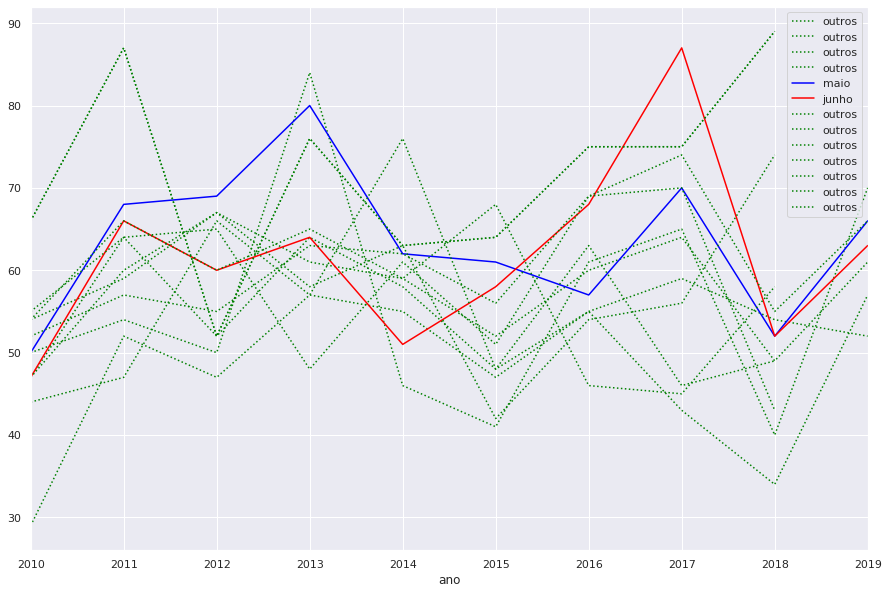

In [45]:
acidentes_com_vitimas = df_acidentes_rodovias_2010_2019[df_acidentes_rodovias_2010_2019.classificacao_acidente == "Com Vítimas Feridas"]
acidentes_com_vitimas_janeiro = acidentes_com_vitimas[acidentes_com_vitimas.data_inversa.dt.month == 1].groupby('ano').size()
acidentes_com_vitimas_fevereiro = acidentes_com_vitimas[acidentes_com_vitimas.data_inversa.dt.month == 2].groupby('ano').size()
acidentes_com_vitimas_março = acidentes_com_vitimas[acidentes_com_vitimas.data_inversa.dt.month == 3].groupby('ano').size()
acidentes_com_vitimas_abril = acidentes_com_vitimas[acidentes_com_vitimas.data_inversa.dt.month == 4].groupby('ano').size()
acidentes_com_vitimas_maio = acidentes_com_vitimas[acidentes_com_vitimas.data_inversa.dt.month == 5].groupby('ano').size()
acidentes_com_vitimas_junho = acidentes_com_vitimas[acidentes_com_vitimas.data_inversa.dt.month == 6].groupby('ano').size()
acidentes_com_vitimas_julho = acidentes_com_vitimas[acidentes_com_vitimas.data_inversa.dt.month == 7].groupby('ano').size()
acidentes_com_vitimas_agosto = acidentes_com_vitimas[acidentes_com_vitimas.data_inversa.dt.month == 8].groupby('ano').size()
acidentes_com_vitimas_setembro = acidentes_com_vitimas[acidentes_com_vitimas.data_inversa.dt.month == 9].groupby('ano').size()
acidentes_com_vitimas_outubro = acidentes_com_vitimas[acidentes_com_vitimas.data_inversa.dt.month == 10].groupby('ano').size()
acidentes_com_vitimas_novembro = acidentes_com_vitimas[acidentes_com_vitimas.data_inversa.dt.month == 11].groupby('ano').size()
acidentes_com_vitimas_dezembro = acidentes_com_vitimas[acidentes_com_vitimas.data_inversa.dt.month == 12].groupby('ano').size()

acidentes_com_vitimas = [acidentes_com_vitimas_janeiro, acidentes_com_vitimas_fevereiro, acidentes_com_vitimas_março, acidentes_com_vitimas_abril, acidentes_com_vitimas_maio, acidentes_com_vitimas_junho, acidentes_com_vitimas_julho, acidentes_com_vitimas_agosto, acidentes_com_vitimas_agosto, acidentes_com_vitimas_setembro, acidentes_com_vitimas_outubro, acidentes_com_vitimas_novembro, acidentes_com_vitimas_dezembro]
count = 1
for acidente in acidentes_com_vitimas:
    
    if count == 5:
        acidente.plot(linestyle = '-', color = 'blue', label = 'maio')
        label_added = True
        
    elif count == 6:
        acidente.plot(linestyle = '-', color = 'red', label = 'junho')
        label_added = True
    else:
        acidente.plot(linestyle = 'dotted', color = 'green', label = 'outros')
        label_added = True
    leg = plt.legend()
    count = count + 1


Text(0.5, 1.0, 'Número de acidentes registrados pelo DER por ano')

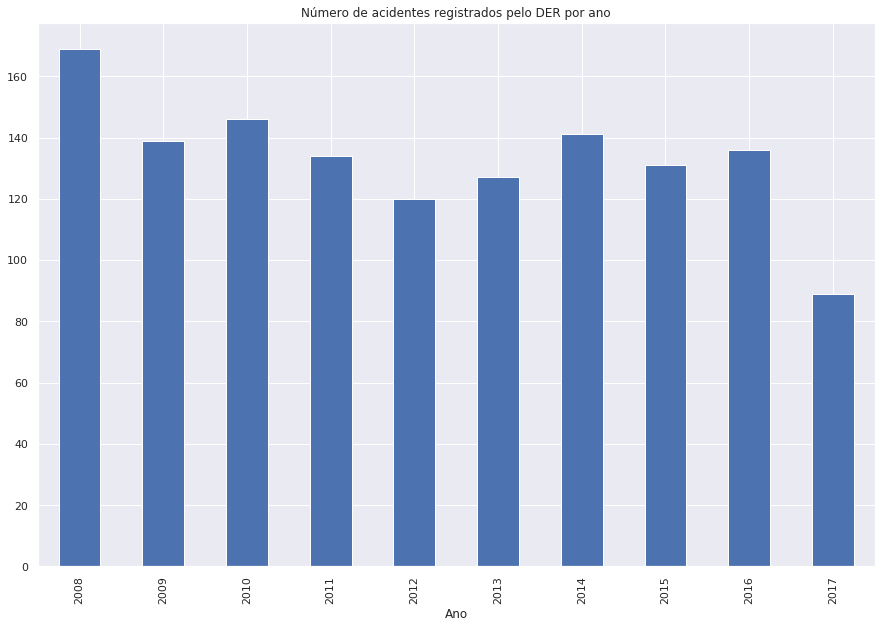

In [47]:
acidentes_fatais_DER = df_acidentes_fatais_2008_2017.groupby('Ano').size()
acidentes_fatais_DER.plot(kind = 'bar')
plt.title('Número de acidentes registrados pelo DER por ano')

Text(0.5, 1.0, 'Número de acidentes registrados pelo DER no mês de Maio')

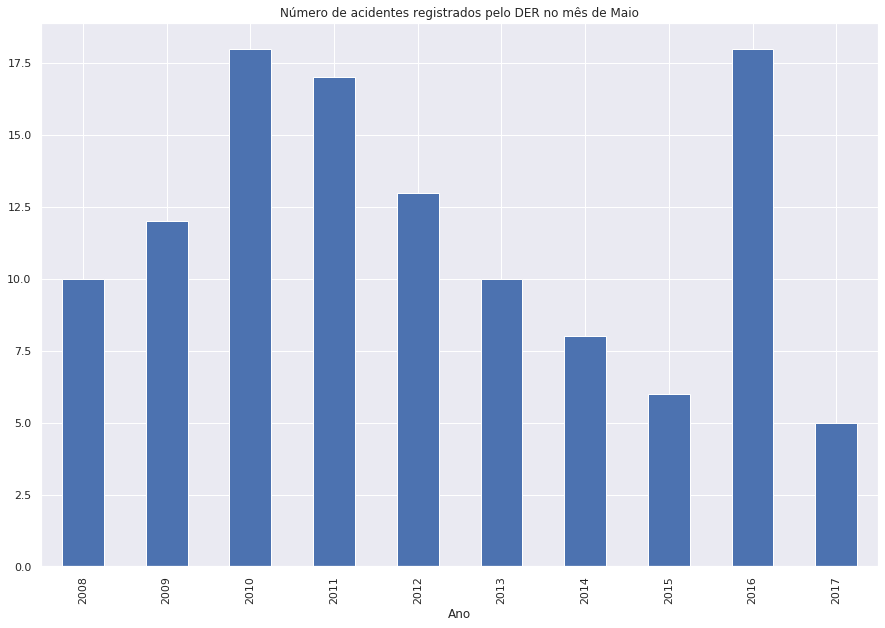

In [46]:
acidentes_fatais_2008_2017_maio = df_acidentes_fatais_2008_2017
acidentes_fatais_2008_2017_maio['Data'] = pd.to_datetime(acidentes_fatais_2008_2017_maio['Data'])
acidentes_fatais_2008_2017_maio = acidentes_fatais_2008_2017_maio[acidentes_fatais_2008_2017_maio['Data'].dt.month == 5]
acidentes_fatais_2008_2017_maio.groupby('Ano').size().plot(kind = 'bar')
plt.title('Número de acidentes registrados pelo DER no mês de Maio')

### Observações

* Compara meses com operação funil
* Nos anos e meses em que foram implementadas as operações o número de acidentes aumentou
* Apesar da campanha o valor se manteve em 2012

/home/iago/anaconda3/envs/tccEnv/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


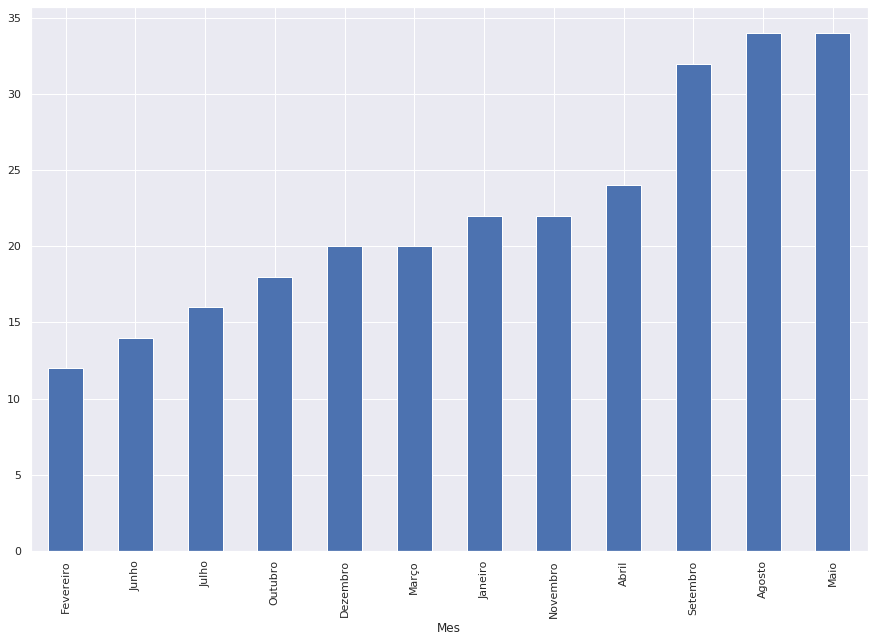

In [100]:
acidentes_fatais_2011_janeiro = df_acidentes_fatais_2008_2017
acidentes_fatais_2011_janeiro['Data'] = pd.to_datetime(acidentes_fatais_2011_janeiro['Data'])
acidentes_fatais_2011_janeiro = acidentes_fatais_2011_janeiro[acidentes_fatais_2011_janeiro['Data'].dt.year == 2011]
acidentes_fatais_2011_janeiro['Mes'] = acidentes_fatais_2011_janeiro['Data'].dt.month

meses = {1: 'Janeiro', 2:'Fevereiro', 3:'Março', 4:'Abril', 5:'Maio', 6:'Junho', 7:'Julho', 8:'Agosto', 9:'Setembro', 10:'Outubro', 11:'Novembro', 12:'Dezembro'}
acidentes_fatais_2011_janeiro = acidentes_fatais_2011_janeiro.replace({'Mes': meses})
acidentes_fatais_2011_janeiro.groupby('Mes').size().sort_values().plot(kind = 'bar')

/home/iago/anaconda3/envs/tccEnv/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


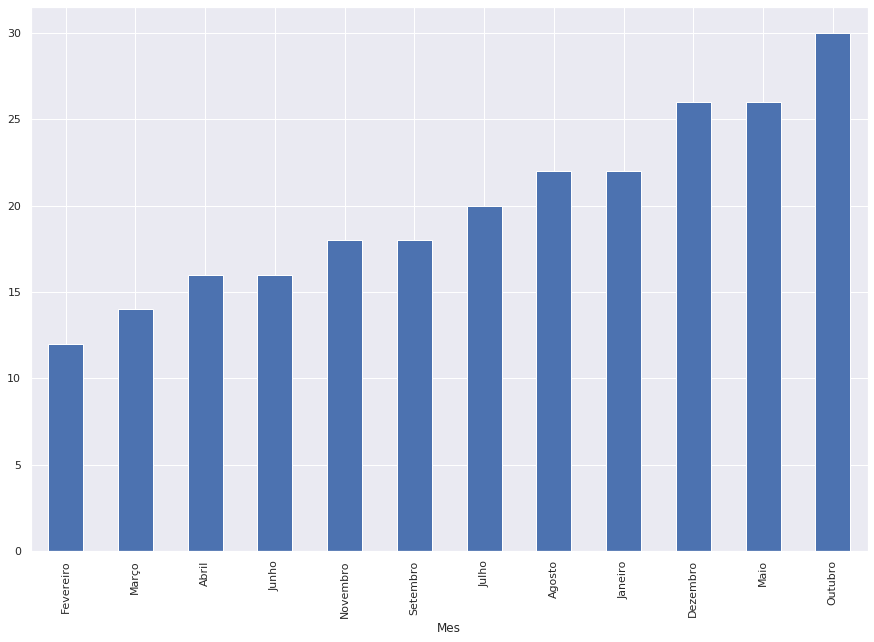

In [98]:
acidentes_fatais_2012_janeiro = df_acidentes_fatais_2008_2017
acidentes_fatais_2012_janeiro['Data'] = pd.to_datetime(acidentes_fatais_2012_janeiro['Data'])
acidentes_fatais_2012_janeiro = acidentes_fatais_2012_janeiro[acidentes_fatais_2012_janeiro['Data'].dt.year == 2012]
acidentes_fatais_2012_janeiro['Mes'] = acidentes_fatais_2012_janeiro['Data'].dt.month

meses = {1: 'Janeiro', 2:'Fevereiro', 3:'Março', 4:'Abril', 5:'Maio', 6:'Junho', 7:'Julho', 8:'Agosto', 9:'Setembro', 10:'Outubro', 11:'Novembro', 12:'Dezembro'}
acidentes_fatais_2012_janeiro = acidentes_fatais_2012_janeiro.replace({'Mes': meses})
acidentes_fatais_2012_janeiro.groupby('Mes').size().sort_values().plot(kind = 'bar')

/home/iago/anaconda3/envs/tccEnv/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


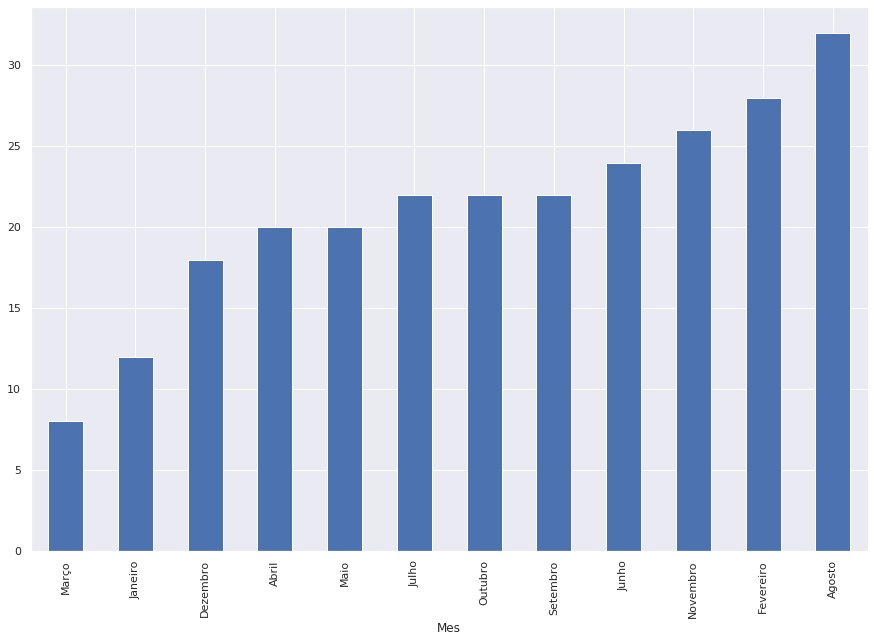

In [101]:
acidentes_fatais_2013_janeiro = df_acidentes_fatais_2008_2017
acidentes_fatais_2013_janeiro['Data'] = pd.to_datetime(acidentes_fatais_2013_janeiro['Data'])
acidentes_fatais_2013_janeiro = acidentes_fatais_2013_janeiro[acidentes_fatais_2013_janeiro['Data'].dt.year == 2013]
acidentes_fatais_2013_janeiro['Mes'] = acidentes_fatais_2013_janeiro['Data'].dt.month

meses = {1: 'Janeiro', 2:'Fevereiro', 3:'Março', 4:'Abril', 5:'Maio', 6:'Junho', 7:'Julho', 8:'Agosto', 9:'Setembro', 10:'Outubro', 11:'Novembro', 12:'Dezembro'}
acidentes_fatais_2013_janeiro = acidentes_fatais_2013_janeiro.replace({'Mes': meses})
acidentes_fatais_2013_janeiro.groupby('Mes').size().sort_values().plot(kind = 'bar')

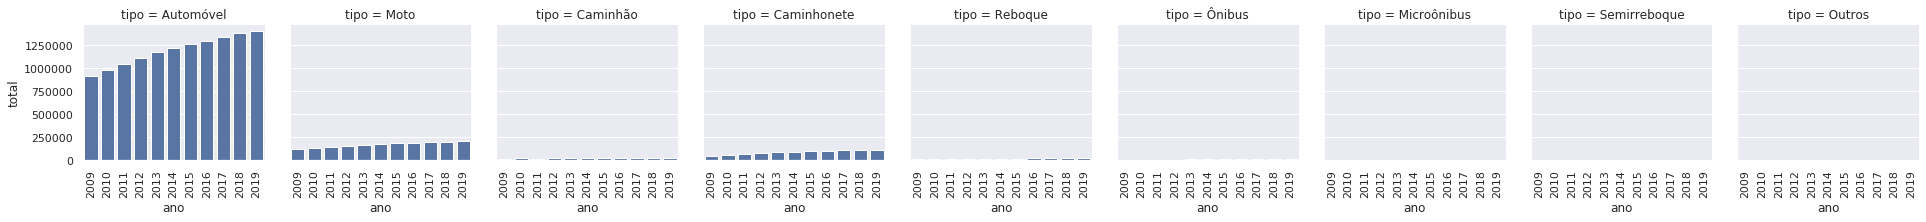

In [184]:
lst_anos = []
for i in range(2009, 2020):
    lst_anos.append(str(i))

frota_veiculos = df_frota_veiculos_2009_2019.melt(id_vars = ['tipo'], value_vars = lst_anos)
frota_veiculos.columns = ['tipo', 'ano', 'total']
frota_veiculos = frota_veiculos[frota_veiculos.tipo != 'Frota']

graph = sns.FacetGrid(frota_veiculos, col = 'tipo')
graph.map(sns.barplot, 'ano', 'total', order = lst_anos)

for ax in graph.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

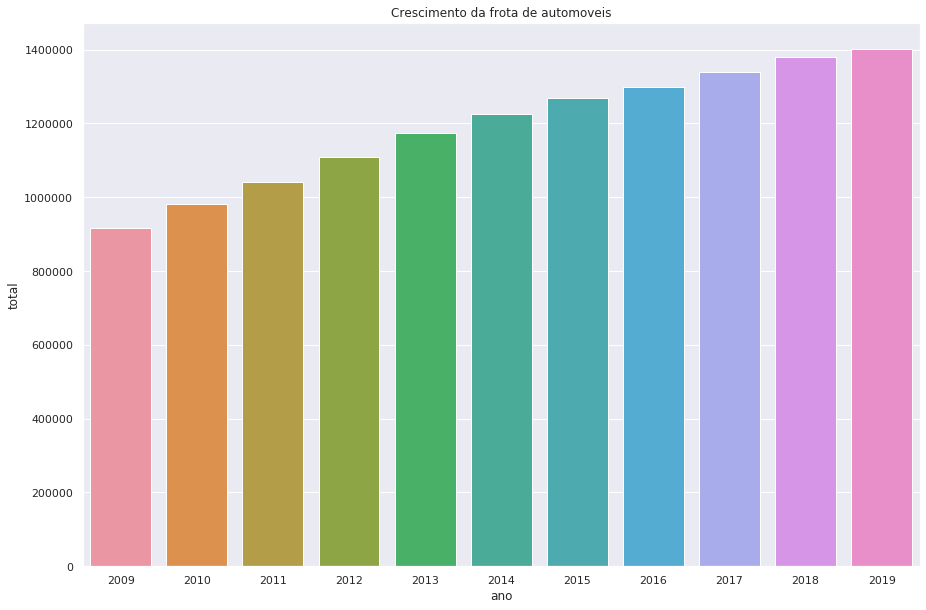

In [180]:
frota_veiculos_automovel = frota_veiculos[frota_veiculos.tipo == 'Automóvel']
frota_veiculos_automovel
plt.title('Crescimento da frota de automoveis')
sns.barplot(x = 'ano', y = 'total', data = frota_veiculos_automovel)

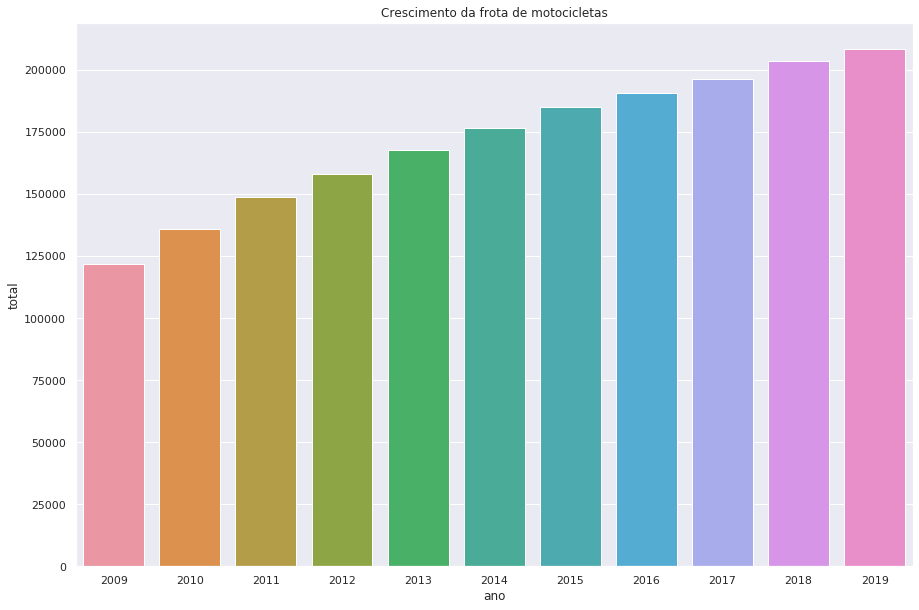

In [175]:
frota_veiculos_moto = frota_veiculos[frota_veiculos.tipo == 'Moto']
frota_veiculos_moto
plt.title('Crescimento da frota de motocicletas')
sns.barplot(x = 'ano', y = 'total', data = frota_veiculos_moto)

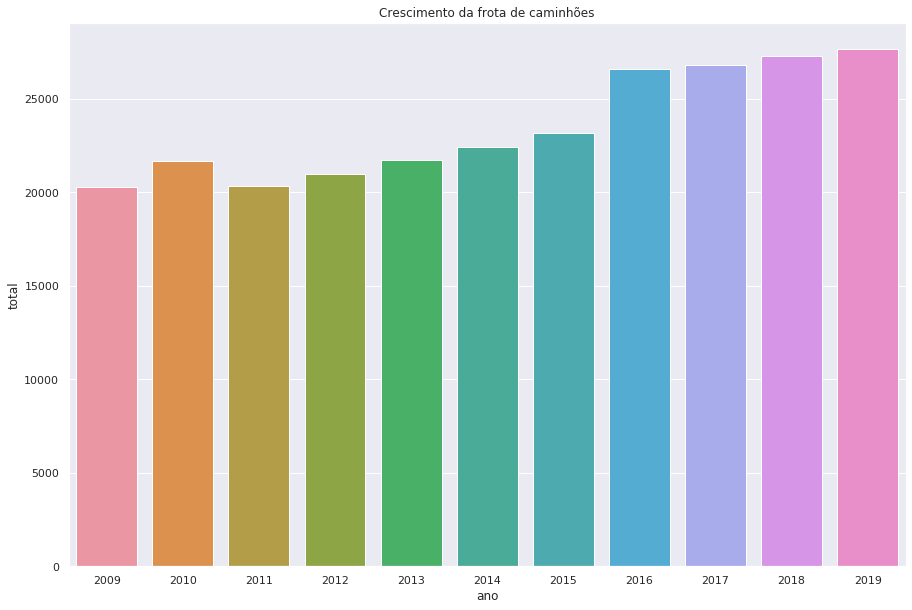

In [179]:
frota_veiculos_caminhao = frota_veiculos[frota_veiculos.tipo == 'Caminhão']
frota_veiculos_caminhao
plt.title('Crescimento da frota de caminhões')
sns.barplot(x = 'ano', y = 'total', data = frota_veiculos_caminhao)

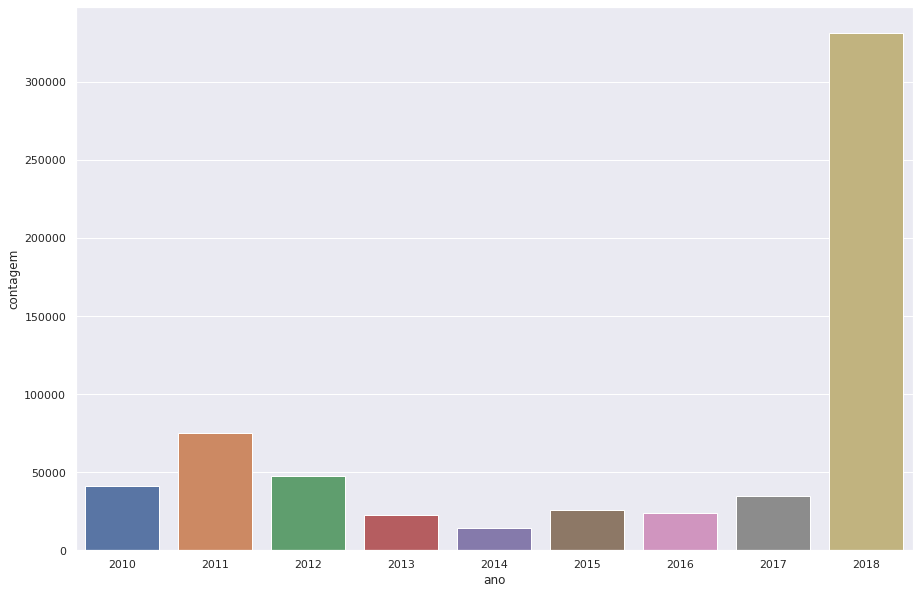

In [22]:
infracoes_prf_maio = df_infracoes_2010_2018
infracoes_prf_maio.dat_infracao = pd.to_datetime(infracoes_prf_maio.dat_infracao)

#infracoes_prf_maio = infracoes_prf_maio[infracoes_prf_maio.dat_infracao.dt.month == 5]
infracoes_prf_maio['ano'] = infracoes_prf_maio.dat_infracao.dt.year

infracoes_prf_maio = infracoes_prf_maio.groupby('ano').size().reset_index(name = 'contagem')

sns.barplot(x = 'ano', y = 'contagem', data = infracoes_prf_maio)